In [14]:
#Euclidean Distance

import torch
import numpy as np
import glob
import os

# Load the tensors from the .pt file
device = torch.device('cpu')
folder1 = './test/clean'
folder2 = './test/hazy'
folder3 = './test/dehaze'
out = './oh.txt'
out1 = './op.txt'

for data in glob.glob(folder1 + '/*.pt'):
    filename = os.path.basename(data)
    print(filename)
    # Load the two tensors
    tensor1 = torch.load(data, map_location=device)
    tensor2 = torch.load(os.path.join(folder2, filename), map_location=device)
    tensor3 = torch.load(os.path.join(folder2, filename), map_location=device)
    tensor1_squeezed = tensor1.squeeze(0)
    tensor2_squeezed = tensor2.squeeze(0)
    tensor3_squeezed = tensor3.squeeze(0)

  
    # Compute the Euclidean distance between the two tensors
    #distance = torch.dist(tensor1, tensor2,p=2, dim=(1, 2, 3))
    distance = torch.dist(tensor1, tensor2, p=2)
    distance1 = torch.dist(tensor1, tensor3, p=2)
    print('Euclidean distance:', distance)
    with open(out, "a+") as f:
        f.write("%.4f \n" % (distance))
    with open(out1, "a+") as f:
        f.write("%.4f \n" % (distance1))

aachen_000004_000019_leftImg8bit.pt
Euclidean distance: tensor(1094.7708)
aachen_000001_000019_leftImg8bit.pt
Euclidean distance: tensor(1529.5956)
aachen_000000_000019_leftImg8bit.pt
Euclidean distance: tensor(1269.3842)
aachen_000003_000019_leftImg8bit.pt
Euclidean distance: tensor(1353.6876)
aachen_000002_000019_leftImg8bit.pt
Euclidean distance: tensor(1401.7972)


/tmp/ipykernel_6593/1170937164.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


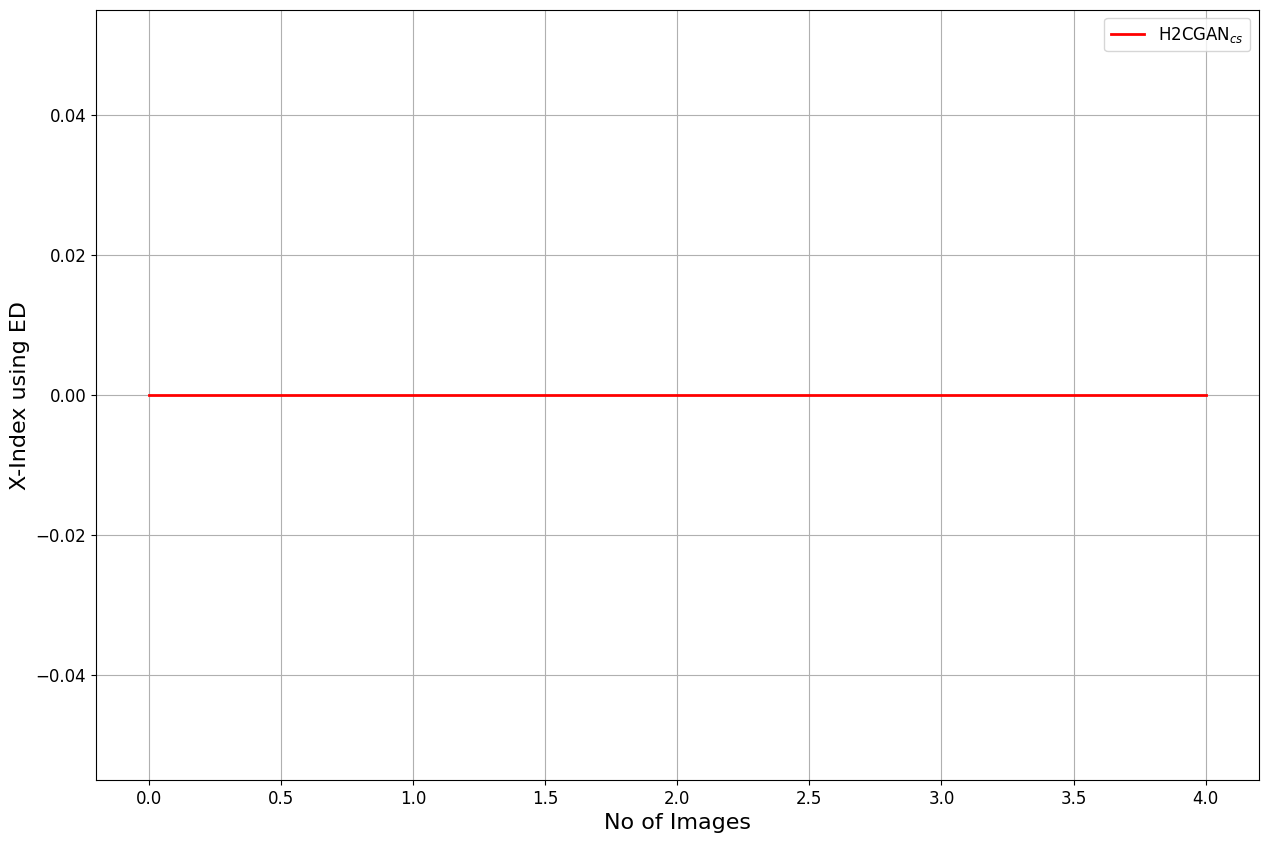

In [14]:
#Euclidean Graph
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Read the data from the text files
with open('./op.txt', 'r') as f:

    data1 = [float(line.strip()) for line in f.readlines()]


with open('./oh.txt', 'r') as f:
    data2 = [float(line.strip()) for line in f.readlines()]


# Compute a-b/a+b
result = [(a_i - b_i) / (a_i + b_i) for a_i, b_i in zip(data1, data2)]


# Smooth the data using LOESS
smooth_result = lowess(result, range(len(result)), frac=0.0001, return_sorted=False)

# Create x-axis data
x = list(range(len(result)))

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(15, 10))

# Set plot style
plt.style.use('seaborn-dark-palette')

plt.plot(smooth_result, linewidth=2, color='red', label=r'$\mathrm{H2CGAN}_{cs}$')



plt.legend(fontsize=12, loc='upper right')
plt.grid()

# Customize tick marks and labels as needed
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set title and axis labels
plt.xlabel('No of Images', fontsize=16)
plt.ylabel('X-Index using ED', fontsize=16)

fig.savefig('ED.svg', format='svg', dpi=1200)

# Show plot
plt.show()



In [32]:
# Activation sum .csv
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import csv

# Load the tensors from the .pt file
device = torch.device('cpu')
folder1 = './test1/RIS_Ori'
folder2 = './test1/DID'
folder3 = './test1/R2CGAN'

result_tensors = []
file1_data = []
file2_data = []
file3_data = []
file4_data = []
out1 = './test1/ris_did_greater.csv'
out2 = './test1/ris_did_lesser.csv'
out3 = './test1/ris_r2cgan_greater.csv'
out4 = './test1/ris_r2cgan_lesser.csv'
for data in glob.glob(folder1 + '/*.pt'):
    filename = os.path.basename(data)
    # Load the two tensors
    tensor1_dict = torch.load(data, map_location=device)
    tensor1_key = list(tensor1_dict.keys())[0] # assuming the key is the first key in the dictionary
    tensor1 = tensor1_dict[tensor1_key]
    tensor2_dict = torch.load(os.path.join(folder2, filename), map_location=device)
    tensor2_key = list(tensor2_dict.keys())[0] # assuming the key is the first key in the dictionary
    tensor2 = tensor2_dict[tensor2_key]
    tensor3_dict = torch.load(os.path.join(folder3, filename), map_location=device)
    tensor3_key = list(tensor3_dict.keys())[0] # assuming the key is the first key in the dictionary
    tensor3 = tensor3_dict[tensor2_key]
    # subtract the two tensors
    result = tensor1 - tensor2
    result1 = tensor1 - tensor3
    # get indices and values for which result is greater than 0.5 or less than -0.5
    indices = torch.where(result > 0.5)  
    indices13 = torch.where(result1 > 0.5)  
    values1 = result[indices]
    values13 = result1[indices13]
    sum_values1 = torch.sum(values1)
    sum_values13 = torch.sum(values13)
    indices1 = torch.where(result < -0.5)
    indices23 = torch.where(result1 < -0.5)
    values2 = result[indices1]
    values23 = result1[indices23]
    sum_values2 = torch.sum(values2)
    sum_values23 = torch.sum(values23)
    file1_data.append([sum_values1.item()])
    file2_data.append([sum_values2.item()])
    file3_data.append([sum_values13.item()])
    file4_data.append([sum_values23.item()])
    result_tensors.append(result)

# Save the file data lists to CSV files
with open(out1, mode='w', newline='') as file1:
    writer = csv.writer(file1)
    writer.writerow(['sum_values'])
    for data in file1_data:
        writer.writerow(data)

with open(out2, mode='w', newline='') as file2:
    writer = csv.writer(file2)
    writer.writerow(['sum_values'])
    for data in file2_data:
        writer.writerow(data)

# Save the file data lists to CSV files
with open(out3, mode='w', newline='') as file3:
    writer = csv.writer(file3)
    writer.writerow(['sum_values'])
    for data in file3_data:
        writer.writerow(data)

with open(out4, mode='w', newline='') as file4:
    writer = csv.writer(file4)
    writer.writerow(['sum_values'])
    for data in file4_data:
        writer.writerow(data)


/tmp/ipykernel_6593/2897827971.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(df1.iloc[:,0], df3.iloc[:,0], 'bo', label='RIS-Ori & RIS-DID', color='blue')
/tmp/ipykernel_6593/2897827971.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(df2.iloc[:,0], df4.iloc[:,0], 'ro', label='RIS-Ori & R2CGAN', color='red')


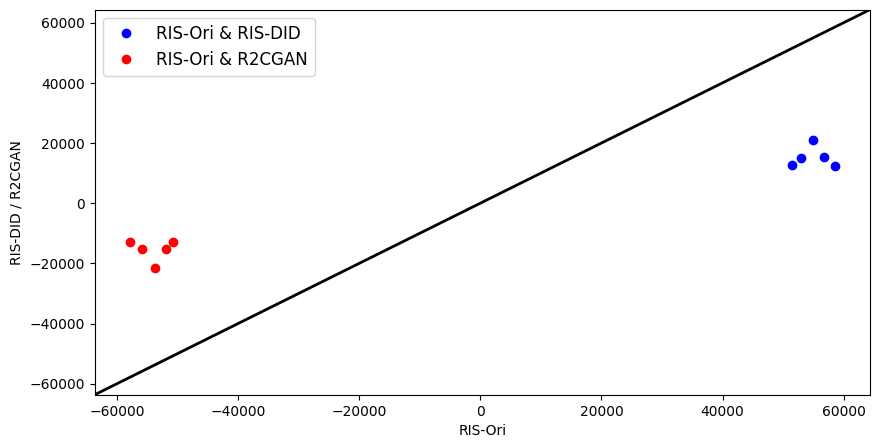

In [34]:
#Activation Sum Plot

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df1 = pd.read_csv('./test1/ris_did_greater.csv')
df2 = pd.read_csv('./test1/ris_did_lesser.csv')
df3 = pd.read_csv('./test1/ris_r2cgan_greater.csv')
df4 = pd.read_csv('./test1/ris_r2cgan_lesser.csv')
# Plot the data

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df1.iloc[:,0], df2.iloc[:,0], 'bo', label='RIS-Ori & RIS-DID', color='blue')
ax.plot(df3.iloc[:,0], df4.iloc[:,0], 'ro', label='RIS-Ori & R2CGAN', color='red')

# Add a diagonal solid black line
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
line_min = min(xmin, ymin)
line_max = max(xmax, ymax)
ax.plot([line_min, line_max], [line_min, line_max], 'k-', linewidth=2)

# Set the limits for the x and y axes
ax.set_xlim([line_min, line_max])
ax.set_ylim([line_min, line_max])

# Add axis labels and legend
ax.set_xlabel('RIS-Ori')
ax.set_ylabel('RIS-DID / R2CGAN')
ax.legend(fontsize='large') 
fig.savefig('RIS_Graph3.svg', format='svg', dpi=1200)

# Show the plot
plt.show()
